In [1]:
using Plots
Plots.gr()

Plots.GRBackend()

## 局在モーメントの磁化 ##
$g \mu_B J$の磁気モーメントを持つ原子が$N$個ある場合、磁化$M$は  

　　$M(H,T) = Ng \mu_B JB\left( \frac{g \mu_B J H}{k_B T} \right)$  

となる。ボーア磁子単位にした1イオンあたりの磁化は、  

　　$\mu (H,T) = g JB\left( \frac{g \mu_B J H}{k_B T} \right)$　[$\mu_B$ / ion]

となる。$B$はブリルアン関数で、

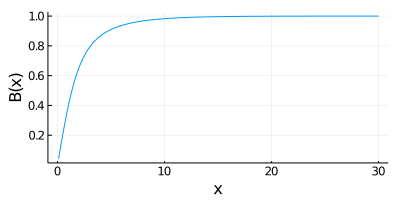

In [2]:
B(x) = ((2J+1)/2J)*coth(((2J+1)/2J)*x) - (1/2J)*coth(x/2J)
J = 7/2;
x = collect(0:0.1:30);
y = B.(x);

plot(size=(400, 200), xlabel="x", ylabel="B(x)", legend = false)
plot!(x,y)

となる。
指定した温度での磁化の磁場変化は以下のようになる。

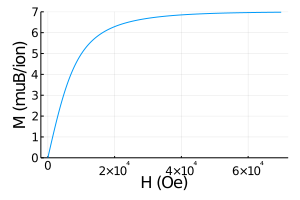

In [3]:
μB = 9.27410*10^(-21); #ボーア磁子
kB = 1.3866*10^(-16); #ボルツマン定数
NA = 6.02217*10^(23); #アボガドロ数
J = 7/2; #全角運動量
L = 0;   #軌道角運動量
S = 7/2; #スピン
T = 2;   #温度
g = 3/2 + (S*(S+1)-L*(L+1))/(2J*(J+1)) #g因子
B(x) = ((2J+1)/2J)*coth(((2J+1)/2J)*x) - (1/2J)*coth(x/2J) #ブリュアン関数
MH(H) = g*J*B((J*g*μB*H)/(kB*T)) #磁化の式(磁場依存性として設定)

h = collect(1:100:70000); #磁場（Oe）
m = MH.(h) #磁化（μB/ion）

plot(size = (300, 200), xlabel = "H (Oe)", ylabel = "M (muB/ion)", ylims = (0,7), legend = false)
plot!(h,m)

## 分子場：Weiss理論 ##
前述のように磁化$M$は

　$M = Ng \mu_B JB\left( \frac{g \mu_B J H}{k_B T} \right)$　・・・式（A）

と書ける。  
磁化$M$による分子場$H_E$を、分子場係数$\lambda$を用いて以下のように定義する。

　　$H_E = \lambda M$

そうすると、これを書き換えて磁化$M$は

　$M = \frac{H_E}{\lambda}$　・・・式（B）
 
となる。  
磁化$M$により分子場$H_E$が生じ、また、分子場により磁化が生じる。  
つまり、「式(A)=式(B)」となれば、磁化が自発的に出るということである。  
ここで、

　$x = \frac{g \mu_B H_E}{k_B T}$、または $H_E = \frac{k_B T x}{g \mu_B}$
 
とすると、式（A）と式（B）は

　$M = Ng \mu_B JB\left( Jx \right)$　・・・式（C）
 
　$M = \frac{k_B T}{\lambda g \mu_B}$　・・・式（D）
 
となる。  
さらに、飽和磁化 $M_0 = Ng\mu_B J$ と転移温度 $T_C = \frac{\lambda J(J+1)Ng^2 \mu_B^2}{3k_B}$ を用いて書き直すと

　$\frac{M}{M_0} = B\left( Jx \right)$　・・・式（E）
 
　$\frac{M}{M_0} = \frac{J+1}{3J}\frac{T}{T_C}x$　・・・式（F）
 
となる。  
これらをグラフに描くと以下のようになる。  
式（F）についてはいくつかの温度(T/Tc)についてプロットしてある。

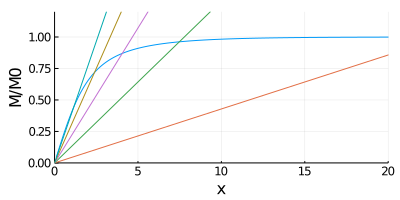

In [4]:
J = 7/2; #全角運動量
t1 = collect(0.1:0.2:0.9); #計算する温度（転移温度で規格化した温度 : T/T_C）
x = collect(0:0.1:30);
m1 =  ((2J+1)/2J) * coth.(((2J+1)/2J) * x) - (1/2J) * coth.(x/2J)
m2 = (t1' * (J+1)/3J) .* x
plot(size=(400, 200))
plot!(x, [m1 m2])
plot!(xlabel = "x", ylabel = "M/M0", legend = false)
plot!(xlims = (0, 20), ylims = (0, 1.2))

グラフを見てわかるように、$T_C$ 以下で 式（E)と式（F）は $T = 0$ 以外の交点を持つ。  
つまり、有限の自発磁化の存在を示す。  
これを求めることにより、自発磁化の温度依存性が得られる。  

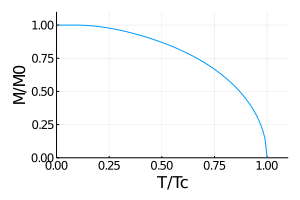

In [5]:
using Roots

function FindRootCalc(J, t)
    m1(x) =  ((2J+1)/2J) * coth(((2J+1)/2J) * x) - (1/2J) * coth(x/2J)
    m2(x) = (t * (J+1)/3J) * x
    m3(x) = m1(x)-m2(x)
    sss = find_zero(m3, 100, Order16())
end

J = 7/2; #全角運動量
calcT = collect(0.01:0.01:1); #T/Tc
calcM = FindRootCalc.(J, calcT) .* calcT * (J+1)/3J; #M/M0
    
plot(size=(300, 200))
plot!(calcT, calcM)
plot!(xlabel = "T/Tc", ylabel = "M/M0", legend = false)
plot!(xlims = (0, 1.1), ylims = (0, 1.1))

In [6]:
using CSV, DataFrames
function saveData2(xwave, y1wave, filename::String)
    df = DataFrame(TdivTc = xwave, MdivM0 = y1wave);
    df |> CSV.write(filename)
end

saveData2(calcT, calcM, "molecularfield.csv")

"molecularfield.csv"